In [61]:
from __future__ import division
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

In [62]:
#Reading csv values
df = pd.read_csv(r'../Dataset/heart_edited_for_report.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,1,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,1,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,1,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,1,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1


In [63]:
#Convert question marks to mean values of the corresponding attribute
df['ca'] = df['ca'].replace('?', 1)
df['thal'] = df['thal'].replace('?', 2)

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,1,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,1,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,1,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,1,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,3,110,265,1,2,130,0,0.0,2,1,1,0
299,71,0,4,112,149,0,0,125,0,1.6,1,0,1,0
300,74,0,2,120,269,0,2,121,1,0.2,2,1,1,0
301,76,0,3,140,197,0,1,116,0,1.1,1,0,1,0


In [65]:
#Split dataframe into x (independant variables) and y (dependant variable)
x_df=df.iloc[1:df.shape[0],0:13]
print(x_df)

y_df=df.iloc[1:df.shape[0],13:14]
print(y_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     34    1   1       118   182    0        2      174      0      0.0   
2     34    0   2       118   210    0        0      192      0      0.7   
3     35    0   4       138   183    0        0      182      0      1.4   
4     35    1   4       120   198    0        0      130      1      1.6   
5     35    1   4       126   282    0        2      156      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   71    0   3       110   265    1        2      130      0      0.0   
299   71    0   4       112   149    0        0      125      0      1.6   
300   74    0   2       120   269    0        2      121      1      0.2   
301   76    0   3       140   197    0        1      116      0      1.1   
302   77    1   4       125   304    0        2      162      1      0.0   

     slope ca thal  
1        2  0    1  
2        2  0    1  
3        2  0    1  
4  

In [66]:
#Function for entire calculations and model fitting
def model_calculations(x_df, y_df):
    # Converting dataframe into arrays
    x=np.array(x_df)
    y=np.array(y_df)
    # Prepare cross validation
    accuracy_scores = []
    kf = KFold(5, True)
    kf.get_n_splits(x)
    print(kf)
    # Enumerate splits
    for train_index, test_index in kf.split(x):
    #   print("TRAIN:", train_index, "TEST:", test_index)
        print("\nTEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Gaussian function of sklearn
        gnb = GaussianNB()
        gnb.fit(x_train, y_train.ravel())
        y_pred = gnb.predict(x_test)
        accuracy_scores.append(metrics.accuracy_score(y_test, y_pred)*100)
        print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
        # convert 2D array to 1D array
        y1=y_test.ravel()
        y_pred1=y_pred.ravel()
        #A confusion matrix is a summary of prediction results on a classification problem.
        #The number of correct and incorrect predictions are summarized with count values and broken down by each class.
        #TP - FN
        #FP - TN
        print("Confusion Matrix")
        cf_matrix=confusion_matrix(y1,y_pred1)
        print(cf_matrix)
        #F1 score = 2*((precision*recall)/(precision+recall))
        #Precision = Number of True Positives divided by the number of True Positives and False Positives.
        #Recall = Number of True Positives divided by the number of True Positives and the number of False Negatives
        print("Precision")
        precision=precision_score(y1,y_pred1,average='weighted')
        print(precision)
        print("Recall")
        recall=recall_score(y1,y_pred1,average='weighted')
        print(recall)
        print("F1 Score")
        f_score=f1_score(y1,y_pred1,average='weighted')
        print(f_score)
        # Matrix from 1D array
        y2=np.zeros(shape=(len(y1),5))
        y3=np.zeros(shape=(len(y_pred1),5))
        for i in range(len(y1)):
            y2[i][int(y1[i])]=1
        for i in range(len(y_pred1)):
            y3[i][int(y_pred1[i])]=1
        # ROC Curve generation
        n_classes = 2

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        print("ROC Curve")
        # First aggregate all false positive rates
        lw=2
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Multi-Class')
        plt.legend(loc="lower right")
        plt.show()

    print(accuracy_scores)
    max_value = max(accuracy_scores)
    min_value = min(accuracy_scores)
    avg_value = sum(accuracy_scores)/len(accuracy_scores)
    print('Max:', max_value)
    print('Min:',min_value)
    print('Avg:',avg_value)

KFold(n_splits=5, random_state=None, shuffle=True)

TEST: [  0   7  13  17  22  24  27  28  31  32  33  34  45  62  64  65  67  70
  73  74  78  79  90  94 100 106 109 111 115 123 125 133 137 138 139 141
 144 153 168 173 177 185 194 197 204 206 207 212 233 238 245 251 257 266
 275 277 282 284 289 290 297]
Gaussian Naive Bayes model accuracy(in %): 81.9672131147541
Confusion Matrix
[[34  3]
 [ 8 16]]
Precision
0.8223427421011545
Recall
0.819672131147541
F1 Score
0.8148945308541287
ROC Curve


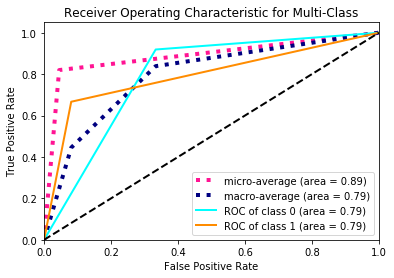


TEST: [  2  10  15  18  19  26  30  51  72  76  81  93  95 102 103 112 114 118
 122 128 150 151 155 156 160 162 170 175 179 189 193 195 201 202 205 213
 216 221 223 228 231 237 241 250 252 253 256 258 261 262 268 273 274 278
 279 281 285 291 293 295 298]
Gaussian Naive Bayes model accuracy(in %): 81.9672131147541
Confusion Matrix
[[28  5]
 [ 6 22]]
Precision
0.8195292689024608
Recall
0.819672131147541
F1 Score
0.8193785172498165
ROC Curve


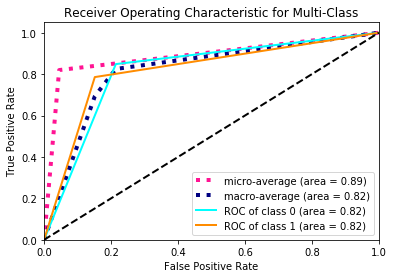


TEST: [  1   4   6   9  21  29  44  47  49  54  55  58  60  61  66  69  71  82
  83  87  98 101 104 110 113 116 127 132 140 145 148 149 159 163 164 167
 171 172 183 188 199 200 208 209 210 217 220 225 229 243 247 249 255 259
 260 264 269 292 296 300]
Gaussian Naive Bayes model accuracy(in %): 81.66666666666667
Confusion Matrix
[[26  6]
 [ 5 23]]
Precision
0.8174267704857249
Recall
0.8166666666666667
F1 Score
0.8168198273461431
ROC Curve


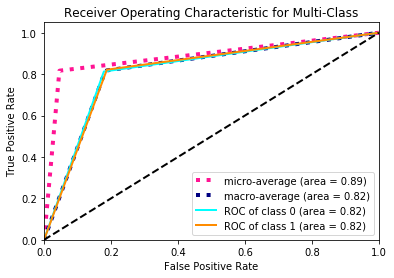


TEST: [  5   8  11  20  35  39  41  42  46  53  56  57  59  68  77  80  86  88
  89  96  99 108 117 120 124 129 131 134 135 136 142 143 146 152 157 158
 161 181 198 203 215 219 222 224 232 235 239 240 242 244 248 265 270 272
 276 287 288 294 299 301]
Gaussian Naive Bayes model accuracy(in %): 85.0
Confusion Matrix
[[30  4]
 [ 5 21]]
Precision
0.8497142857142858
Recall
0.85
F1 Score
0.8496163682864449
ROC Curve


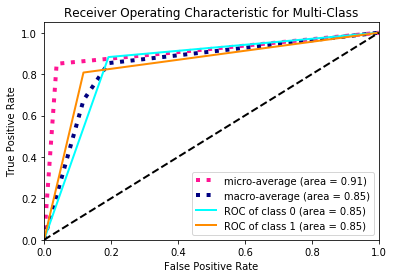


TEST: [  3  12  14  16  23  25  36  37  38  40  43  48  50  52  63  75  84  85
  91  92  97 105 107 119 121 126 130 147 154 165 166 169 174 176 178 180
 182 184 186 187 190 191 192 196 211 214 218 226 227 230 234 236 246 254
 263 267 271 280 283 286]
Gaussian Naive Bayes model accuracy(in %): 91.66666666666666
Confusion Matrix
[[24  3]
 [ 2 31]]
Precision
0.9168552036199096
Recall
0.9166666666666666
F1 Score
0.9165023936919179
ROC Curve


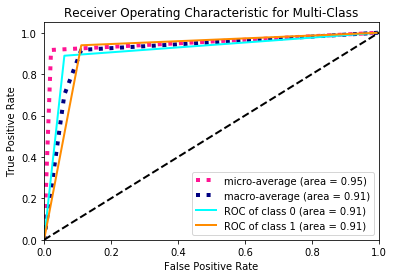

[81.9672131147541, 81.9672131147541, 81.66666666666667, 85.0, 91.66666666666666]
Max: 91.66666666666666
Min: 81.66666666666667
Avg: 84.45355191256832


In [67]:
model_calculations(x_df, y_df)

In [68]:
# Converting dataframe into arrays
x=np.array(x_df)
y=np.array(y_df)
# Prepare cross validation
accuracy_scores = []
kf = KFold(5, True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
# Gaussian function of sklearn
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases 
#when a feature is not available;

#Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions 
#we'd get for a given value. It randomly re-orders a single column of the validation data, leaving the target and all 
#other columns in place, and calculates the prediction accuracy of the now-shuffle data. The process is repeated with 
#multiple shuffles to measure the amount of randomness in the calculation

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gnb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_df.columns.tolist())

Weight,Feature
0.0633 ± 0.0442,exang
0.0600 ± 0.0499,thal
0.0533 ± 0.0490,oldpeak
0.0533 ± 0.0389,cp
0.0333 ± 0.0471,ca
0.0267 ± 0.0452,thalach
0.0267 ± 0.0452,sex
0.0167 ± 0.0365,trestbps
0.0167 ± 0.0422,age
0.0100 ± 0.0267,restecg


In [70]:
#On average, it looks like the most important factors in terms of permutation are:
# 1) Number of major vessels coloured by fluoroscopy. 
# 2) Slope of peak exercise ST segment
# 3) Exercise induced angina
# 4) Sex
# 5) Chest Pain Type

In [71]:
#Drop age, serum cholesterol, fasting blood sugar, resting blood pressure and resting electrocardiographic results
df = df.drop(columns=['age', 'trestbps', 'chol', 'fbs', 'restecg'])

In [72]:
#Split dataframe into x (independant variables) and y (dependant variable)
x_df=df.iloc[1:df.shape[0],0:8]
print(x_df)

y_df=df.iloc[1:df.shape[0],8:9]
print(y_df)

     sex  cp  thalach  exang  oldpeak  slope ca thal
1      1   1      174      0      0.0      2  0    1
2      0   2      192      0      0.7      2  0    1
3      0   4      182      0      1.4      2  0    1
4      1   4      130      1      1.6      1  0    3
5      1   4      156      1      0.0      2  0    3
..   ...  ..      ...    ...      ...    ... ..  ...
298    0   3      130      0      0.0      2  1    1
299    0   4      125      0      1.6      1  0    1
300    0   2      121      1      0.2      2  1    1
301    0   3      116      0      1.1      1  0    1
302    1   4      162      1      0.0      2  3    1

[302 rows x 8 columns]
     target
1         0
2         0
3         0
4         1
5         1
..      ...
298       0
299       0
300       0
301       0
302       1

[302 rows x 1 columns]


KFold(n_splits=5, random_state=None, shuffle=True)

TEST: [  0   1   5   9  23  25  27  33  36  37  40  50  62  73  78  79  81  84
  85  86  93 105 110 115 116 118 125 126 129 133 136 139 155 161 163 173
 174 182 183 189 196 202 204 219 221 224 227 228 229 232 235 237 249 254
 261 264 268 276 277 285 291]
Gaussian Naive Bayes model accuracy(in %): 93.44262295081968
Confusion Matrix
[[29  0]
 [ 4 28]]
Precision
0.942374565325385
Recall
0.9344262295081968
F1 Score
0.9343557200775604
ROC Curve


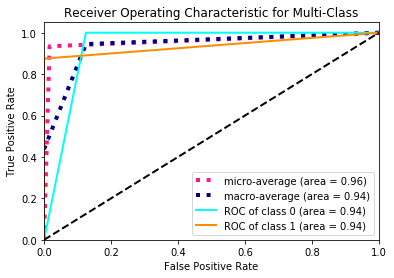


TEST: [  4  10  12  19  20  21  22  28  32  47  52  54  59  61  72  76  80  82
  90  99 108 111 112 117 131 134 135 148 158 160 166 168 171 175 176 177
 180 186 199 200 203 210 212 220 222 223 226 241 243 244 246 251 253 255
 269 271 272 273 281 292 294]
Gaussian Naive Bayes model accuracy(in %): 78.68852459016394
Confusion Matrix
[[24  6]
 [ 7 24]]
Precision
0.7873083024854575
Recall
0.7868852459016393
F1 Score
0.7868852459016393
ROC Curve


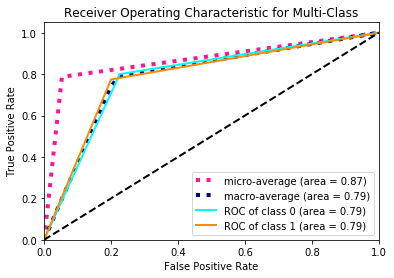


TEST: [  3   6  15  17  18  24  29  35  42  46  51  55  57  63  65  69  71  75
  77  87  95 107 109 120 121 123 124 140 141 142 150 152 156 159 162 170
 172 187 195 198 207 211 213 215 217 218 234 236 239 245 252 256 259 282
 284 286 289 290 299 300]
Gaussian Naive Bayes model accuracy(in %): 85.0
Confusion Matrix
[[32  6]
 [ 3 19]]
Precision
0.8577142857142857
Recall
0.85
F1 Score
0.8517050422617314
ROC Curve


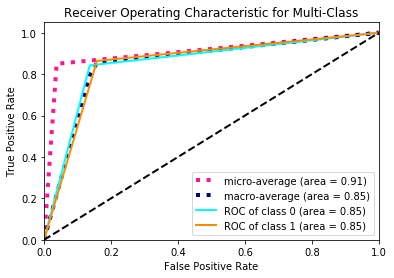


TEST: [  8  11  14  26  30  34  41  44  48  49  58  66  89  91  92  94  96  97
  98 103 106 113 119 127 128 132 138 143 147 151 153 154 157 165 169 178
 181 188 190 191 193 194 201 208 209 216 233 238 242 247 250 257 260 267
 274 275 278 280 293 301]
Gaussian Naive Bayes model accuracy(in %): 90.0
Confusion Matrix
[[31  4]
 [ 2 23]]
Precision
0.9029180695847363
Recall
0.9
F1 Score
0.9004524886877827
ROC Curve


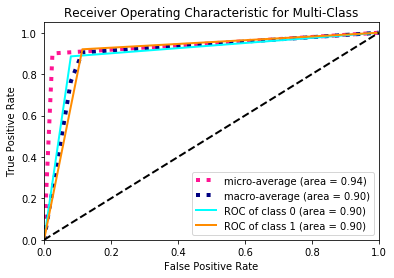


TEST: [  2   7  13  16  31  38  39  43  45  53  56  60  64  67  68  70  74  83
  88 100 101 102 104 114 122 130 137 144 145 146 149 164 167 179 184 185
 192 197 205 206 214 225 230 231 240 248 258 262 263 265 266 270 279 283
 287 288 295 296 297 298]
Gaussian Naive Bayes model accuracy(in %): 75.0
Confusion Matrix
[[28  3]
 [12 17]]
Precision
0.7724999999999999
Recall
0.75
F1 Score
0.7428858867490659
ROC Curve


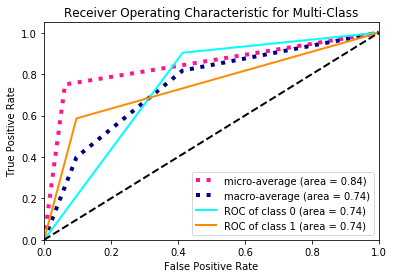

[93.44262295081968, 78.68852459016394, 85.0, 90.0, 75.0]
Max: 93.44262295081968
Min: 75.0
Avg: 84.42622950819673


In [73]:
model_calculations(x_df, y_df)

In [74]:
# converting dataframe into arrays
x=np.array(x_df)
y=np.array(y_df)
# prepare cross validation
accuracy_scores = []
kf = KFold(5, True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
# Gaussian function of sklearn
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
#Permutation Importance
perm = PermutationImportance(gnb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_df.columns.tolist())

Weight,Feature
0.0567 ± 0.0452,cp
0.0533 ± 0.0327,ca
0.0433 ± 0.0452,thal
0.0333 ± 0.0558,oldpeak
0.0300 ± 0.0389,sex
0.0233 ± 0.0340,exang
0.0233 ± 0.0340,thalach
0.0000 ± 0.0211,slope
